In [1]:
import numpy as np
from matplotlib import pyplot as plt

from iminuit import Minuit

import scipy.stats as stats
from scipy.optimize import curve_fit

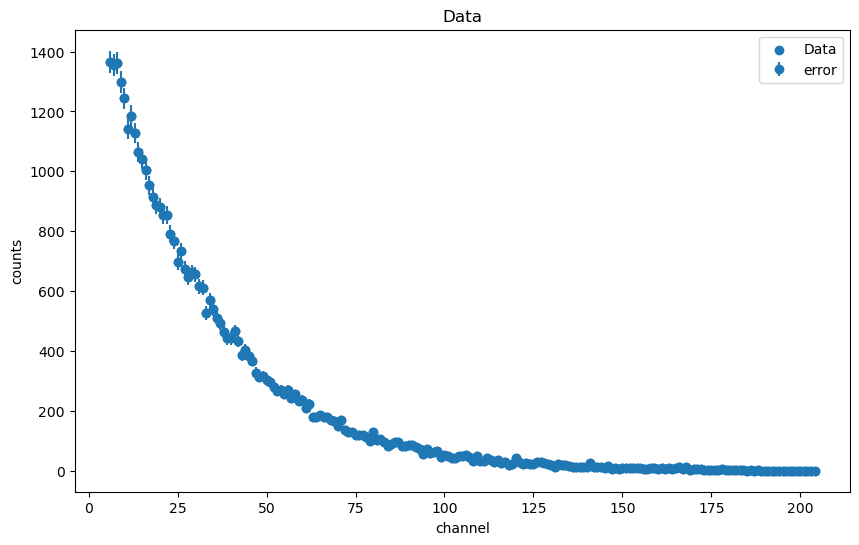

In [4]:
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and an axes.
# Load ne17.dat file
data = np.loadtxt('ne17.dat', skiprows=6, usecols = (0, 1))
# print(data)

x,y  = data[:,0], data[:,1]
# print(x)
# print(y)

# Finding error 
error = np.sqrt(y)


# Plot data
ax.errorbar(x, y, yerr=error, fmt='o', label='error') # Plot some data on the axes.
ax.scatter(x, y, label='Data') # Plot some data on the axes.
ax.set_xlabel('channel') # Add an x-label to the axes.
ax.set_ylabel('counts') # Add a y-label to the axes.
ax.set_title("Data") # Add a title to the axes.
ax.legend() # Add a legend.




Problem: 
- Then fit 
Diagonsis: 
- The errors is zero. Cut this off when fitting
- Need to have binned data


Analysis: 
- The channels must be ms / channel
- The first data is cut off



Solution:
-



Poisson is the correct distribution in this example. Because it is not biased as the others

C:\Users\barit\AppData\Local\Temp\ipykernel_16928\4232515607.py:24: RuntimeWarning: overflow encountered in exp
  popt, pcov = curve_fit(lambda t,a,b: a*np.exp(-b*t),  x,  y,  p0=(4, 0.1), absolute_sigma=True)
C:\Users\barit\AppData\Local\Temp\ipykernel_16928\4232515607.py:24: RuntimeWarning: overflow encountered in multiply
  popt, pcov = curve_fit(lambda t,a,b: a*np.exp(-b*t),  x,  y,  p0=(4, 0.1), absolute_sigma=True)


[1.41484224e+03 6.27468937e-03]
110.46717047175319


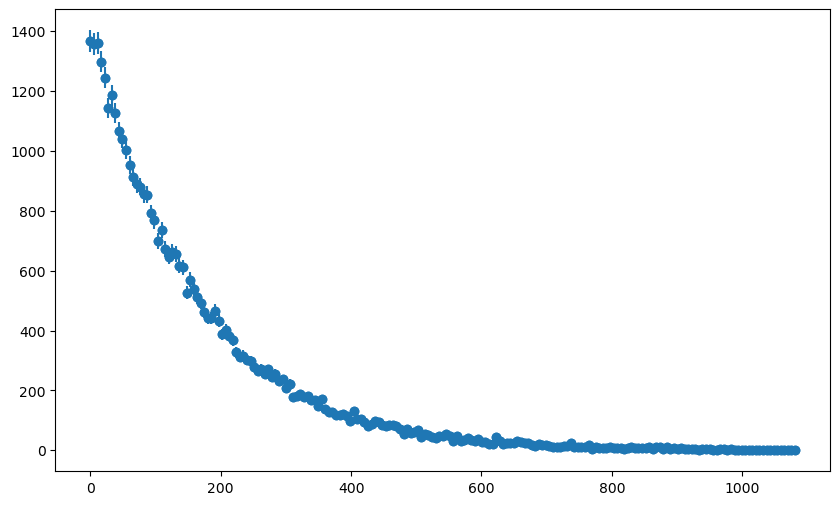

In [28]:
# Define bins: 
x = np.arange(0, 5.46 * len(y), 5.46) # ms


# # Plot again
# fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and an axes.
# ax.hist(x, bins=bins, weights=y, label='Data') # Plot some data on the axes.
# ax.set_xlabel('channel') # Add an x-label to the axes.
# ax.set_ylabel('counts') # Add a y-label to the axes.
# ax.set_title("Data") # Add a title to the axes.
# ax.legend() # Add a legend.
# plt.show()


# Don't fit to data from 184 and up

# plot
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x, y)
ax.errorbar(x, y, yerr=error, fmt='o', label='error') # Plot some data on the axes.

# Use curvefit:
popt, pcov = curve_fit(lambda t,a,b: a*np.exp(-b*t),  x,  y,  p0=(4, 0.1), absolute_sigma=True)



print(popt)


# Finding the half-live 
t12 = np.log(2)/popt[1]

print(t12)

In [8]:
# Try making it with minuit


array([  32.76,   38.22,   43.68,   49.14,   54.6 ,   60.06,   65.52,
         70.98,   76.44,   81.9 ,   87.36,   92.82,   98.28,  103.74,
        109.2 ,  114.66,  120.12,  125.58,  131.04,  136.5 ,  141.96,
        147.42,  152.88,  158.34,  163.8 ,  169.26,  174.72,  180.18,
        185.64,  191.1 ,  196.56,  202.02,  207.48,  212.94,  218.4 ,
        223.86,  229.32,  234.78,  240.24,  245.7 ,  251.16,  256.62,
        262.08,  267.54,  273.  ,  278.46,  283.92,  289.38,  294.84,
        300.3 ,  305.76,  311.22,  316.68,  322.14,  327.6 ,  333.06,
        338.52,  343.98,  349.44,  354.9 ,  360.36,  365.82,  371.28,
        376.74,  382.2 ,  387.66,  393.12,  398.58,  404.04,  409.5 ,
        414.96,  420.42,  425.88,  431.34,  436.8 ,  442.26,  447.72,
        453.18,  458.64,  464.1 ,  469.56,  475.02,  480.48,  485.94,
        491.4 ,  496.86,  502.32,  507.78,  513.24,  518.7 ,  524.16,
        529.62,  535.08,  540.54,  546.  ,  551.46,  556.92,  562.38,
        567.84,  573

In [ ]:


# Fit using minuit

